In [3]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA


In [5]:
train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values


In [7]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [8]:
## Importing and Apply PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(60000, 2)

In [9]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993]


Text(0, 0.5, 'Principal Component 2')

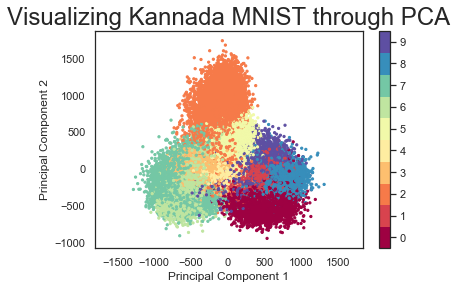

In [10]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')